In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras
from keras import models
from keras import layers, optimizers

In [2]:
def plotter(history):
    plt.figure()
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='test loss')
    plt.xlabel('iterations')
    plt.ylabel('losses')
    plt.legend()

    plt.figure()
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='test accuracy')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    plt.legend()

In [3]:
features = pd.read_csv('C:/Nini/Capstone/CSV_Files/ravdess_extracted_features.csv')

In [4]:
features = features.drop(features.columns[0],axis=1)

In [5]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Emotion
0,-1.432470,-0.727180,-0.068292,0.322855,0.220403,-0.501909,-0.913735,-1.194311,-1.169597,-1.317316,...,-0.968683,-1.032611,-1.091352,-1.107836,-1.109436,-1.105765,-1.109265,-1.158963,-1.049801,neutral
1,-1.348580,-0.622920,-0.200784,0.218926,0.355225,-0.232123,-0.783952,-1.205311,-1.250777,-1.145808,...,-0.977493,-1.053187,-1.061844,-1.113161,-1.097748,-1.077638,-1.074782,-1.119450,-0.993197,neutral
2,-1.363920,-0.824643,-0.347403,0.270267,0.352957,-0.355087,-0.979886,-1.145636,-1.070847,-1.099282,...,-0.948578,-1.003666,-1.043036,-1.106047,-1.091814,-1.043450,-1.014585,-1.025491,-0.847325,neutral
3,-1.319833,-0.649382,0.007934,0.503250,0.499495,-0.273633,-0.861321,-1.046892,-1.030770,-0.940598,...,-0.950088,-1.014536,-1.068581,-1.087196,-1.032275,-0.991478,-0.962977,-0.884886,-0.741385,neutral
4,-1.441263,-0.811067,-0.382130,0.208906,0.190468,-0.388442,-0.971332,-1.197320,-1.139228,-1.152382,...,-1.343250,-1.401270,-1.418414,-1.388660,-1.436732,-1.412904,-1.395927,-1.377904,-1.241393,calm


In [6]:
from sklearn.utils import shuffle
temp = shuffle(features)

In [7]:
df = np.random.rand(len(temp)) < 0.8
train = temp[df]
test = temp[~df]

In [8]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [9]:
X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.transform(y_test))

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1174, 128), y_train shape: (1174, 8)
X_test shape: (266, 128), y_test shape: (266, 8)


c:\Nini\Capstone\src\capstone_env\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Nini\Capstone\src\capstone_env\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [10]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [11]:
model = models.Sequential()

model.add(tf.keras.layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.Conv1D(128, kernel_size=(10), activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(8), padding='same'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv1D(128, kernel_size=(10), activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(8), padding='same'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv1D(64, 5, padding='same',))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [13]:
history=model.fit(x_traincnn, y_train, batch_size=256, epochs=1000, validation_data=(x_testcnn, y_test))

Epoch 1/1000
5/5 [==============================] - 1s 91ms/step - loss: 2.0754 - accuracy: 0.1474 - val_loss: 2.0702 - val_accuracy: 0.2256
Epoch 2/1000
5/5 [==============================] - 0s 56ms/step - loss: 2.0669 - accuracy: 0.1985 - val_loss: 2.0600 - val_accuracy: 0.2519
Epoch 3/1000
5/5 [==============================] - 0s 57ms/step - loss: 2.0544 - accuracy: 0.2019 - val_loss: 2.0460 - val_accuracy: 0.2519
Epoch 4/1000
5/5 [==============================] - 0s 55ms/step - loss: 2.0410 - accuracy: 0.2087 - val_loss: 2.0274 - val_accuracy: 0.2519
Epoch 5/1000
5/5 [==============================] - 0s 56ms/step - loss: 2.0175 - accuracy: 0.2232 - val_loss: 2.0023 - val_accuracy: 0.2519
Epoch 6/1000
5/5 [==============================] - 0s 56ms/step - loss: 1.9947 - accuracy: 0.2411 - val_loss: 1.9721 - val_accuracy: 0.2519
Epoch 7/1000
5/5 [==============================] - 0s 56ms/step - loss: 1.9751 - accuracy: 0.2300 - val_loss: 1.9424 - val_accuracy: 0.2519
Epoch 8/1000


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 119, 64)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 110, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 128)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 128)            163968    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 128)            0         
 g1D)                                                   

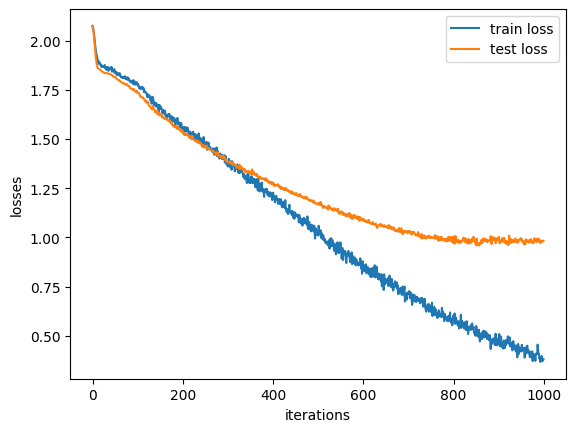

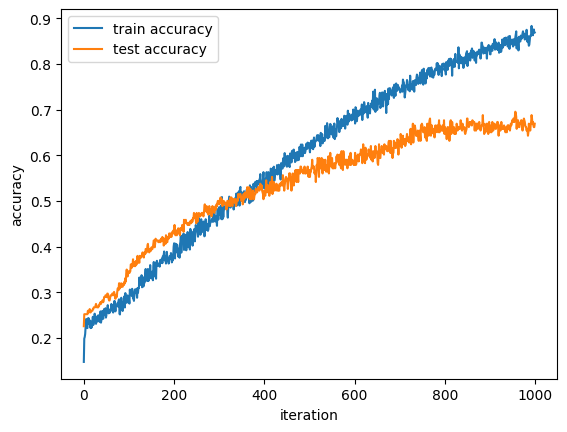

In [14]:
plotter(history)

model.summary()
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) 
result = model.evaluate(X_test,y_test)
print(result)

In [ ]:
model.save('C:/Nini/Capstone/Models/cnn_model_normal.h5')

c:\Nini\Capstone\src\capstone_env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [17]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [18]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.13.1
Num GPUs Available: 0


In [21]:
X_test.shape

(312, 128)